# Data handling - R

## variables

In [29]:
cst<-3 ## num of log pop cluster determine log time clusters

## data input and pre-processing

In [30]:
## data cleaning
a<-read.csv("../data/LogisticGrowthData.csv", header = T, stringsAsFactors = F)[,-1]
  a<-a[,c(3,6:9,1,2,5)]
  colnames(a)=c("Temp.C","clade","substrate","replicate","SourceRef","Time.hr","Popn_Change","Popn_DataUnit")
  a$Time.hr<-abs(a$Time.hr) ## convert -ve times
  a$clade<-gsub(".1|.2|..RDA.R.","",a$clade) ## condense spp names
  a$clade<-gsub("spp.|sp.","sp",a$clade) ## condense spp names
  a$clade<-gsub("[.]"," ",a$clade) ## condense spp names
  a$clade<-gsub("77|88|Strain 97|StrainCYA28|subsp Carotovorum Pc","",a$clade) ## rm specific unnecessary things for better spp categorizing
  a$clade<-trimws(a$clade) ## condense spp names (rm white spaces from both ends)
  # levels(as.factor(a$clade))

In [31]:
## data subset selection -- select the largest data subset
  a.DU.lv<-levels(as.factor(a$Popn_DataUnit))
  a.Tp.lv<-levels(as.factor(a$Temp.C))
  a.cd.lv<-levels(as.factor(a$clade))
  a.ss.lv<-levels(as.factor(a$substrate))
  a.rp.lv<-levels(as.factor(a$replicate))
  a.ct.lv<-levels(as.factor(a$SourceRef))

In [32]:
## hierarchical selection of available subsets
  p.rec<-as.data.frame(matrix(nrow = 0, ncol = 6))
  cat("R Filtering 1st set of columns\n")
  p.2<-p.4<-p.6<-1;repeat{
    ## check repeat loop running num seq
    if(p.2==length(a.Tp.lv)){
      if(p.4==length(a.ss.lv)){
        if(p.6==length(a.ct.lv)){
          break
        }else{
          p.2<-p.4<-1
          p.6<-p.6+1
        }
      }else{
        p.2<-1
        p.4<-p.4+1
      }
    }else{
      p.2<-p.2+1
    }
    ## scan subset dimension
    p.7<-dim(a[which(a$Temp.C==a.Tp.lv[p.2] &
                       a$substrate==a.ss.lv[p.4] &
                       a$SourceRef==a.ct.lv[p.6]),])[1]
    if(p.7 > 0){p.rec[(dim(p.rec)[1]+1),]<-c(NA,p.2,NA,p.4,NA,p.6)}
  }
  p.recL<-dim(p.rec)[1]

R Filtering 1st set of columns


In [33]:
cat("R Filtering 2nd set of columns\n")
  p.1<-p.3<-p.5<-1;repeat{
    ## check repeat loop running num seq
    if(p.1==length(a.DU.lv)){
      if(p.3==length(a.cd.lv)){
        if(p.5==length(a.rp.lv)){
          break
        }else{
          p.1<-p.3<-1
          p.5<-p.5+1
        }
      }else{
        p.1<-1
        p.3<-p.3+1
      }
    }else{
      p.1<-p.1+1
    }
    ## scan subset dimension
    p.7<-dim(a[which(a$Popn_DataUnit==a.DU.lv[p.1] &
                       a$clade==a.cd.lv[p.3] &
                       a$replicate==a.rp.lv[p.5]),])[1]
    if(p.7 > 0){p.rec[(dim(p.rec)[1]+1),]<-c(p.1,NA,p.3,NA,p.5,NA)}
  }
  a.0<-as.data.frame(matrix(nrow = 0,ncol = dim(a)[2]))

R Filtering 2nd set of columns


In [34]:
cat("R Combine filtering result\n")
  for(i in 1:p.recL){ ## further select for subset with largest data points
    for(j in (p.recL):dim(p.rec)[1]){
      p.7<-a[which(a$Popn_DataUnit==a.DU.lv[p.rec[j,1]] &
                     a$Temp.C==a.Tp.lv[p.rec[i,2]] &
                     a$clade==a.cd.lv[p.rec[j,3]] &
                     a$substrate==a.ss.lv[p.rec[i,4]] &
                     a$replicate==a.rp.lv[p.rec[j,5]] &
                     a$SourceRef==a.ct.lv[p.rec[i,6]]),]
      if(dim(p.7)[1] > dim(a.0)[1]){a.0<-p.7}
    }
  };rm(i,j)
  rm(list=ls(pattern="p.|.lv"))

R Combine filtering result


In [35]:
## subsetted data export
cat("R Writing data\n")
aa<-data.frame("logTime"=log(a.0[,6]),"logPop"=log(a.0[,7]),a.0[,6:7])

R Writing data


## time-population clustering definitions

In [36]:
## data clustering: can't use k-mean (min in-cluster mean distance)
aa$cluster<-ifelse(aa$Time.hr<10,1,ifelse(aa$Time.hr>150,3,2))
write.csv(aa,"../data/Log_data.csv",quote = F, row.names = F)

## trial cluster plots

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

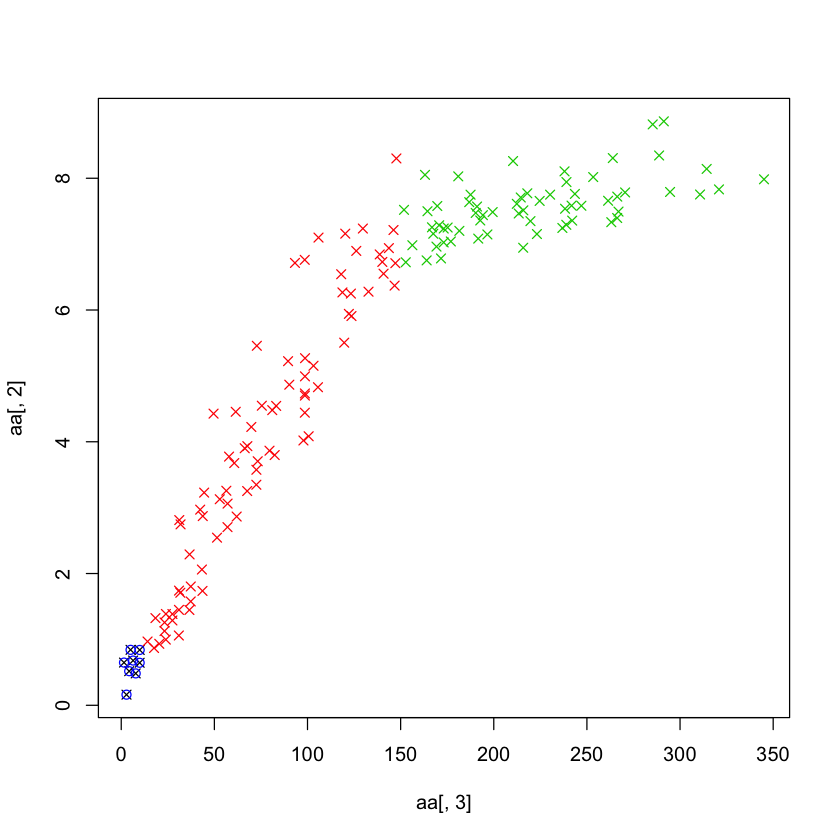

In [37]:
## visual cluster plot
b<-aa[which(aa$cluster==1),]
plot(x=aa[,3], y=aa[,2], col=as.factor(aa$cluster),pch=4)
points(x=b[,3], y=b[,2], add=T, col="blue")
rm(b)

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

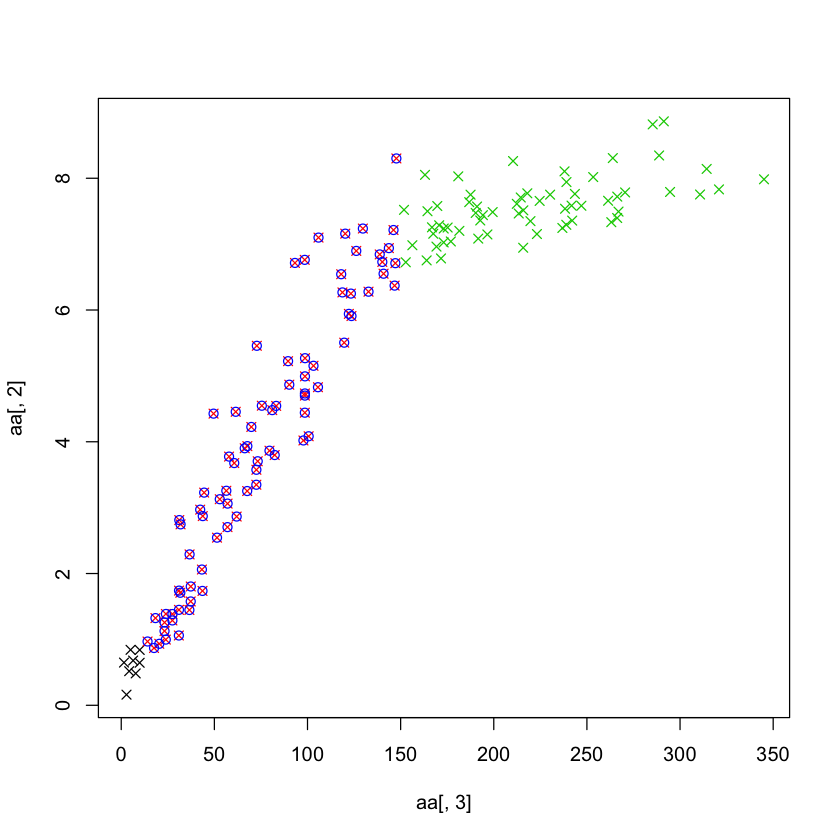

In [38]:
## visual cluster plot
b<-aa[which(aa$cluster==2),]
plot(x=aa[,3], y=aa[,2], col=as.factor(aa$cluster),pch=4)
points(x=b[,3], y=b[,2], add=T, col="blue")
rm(b)

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

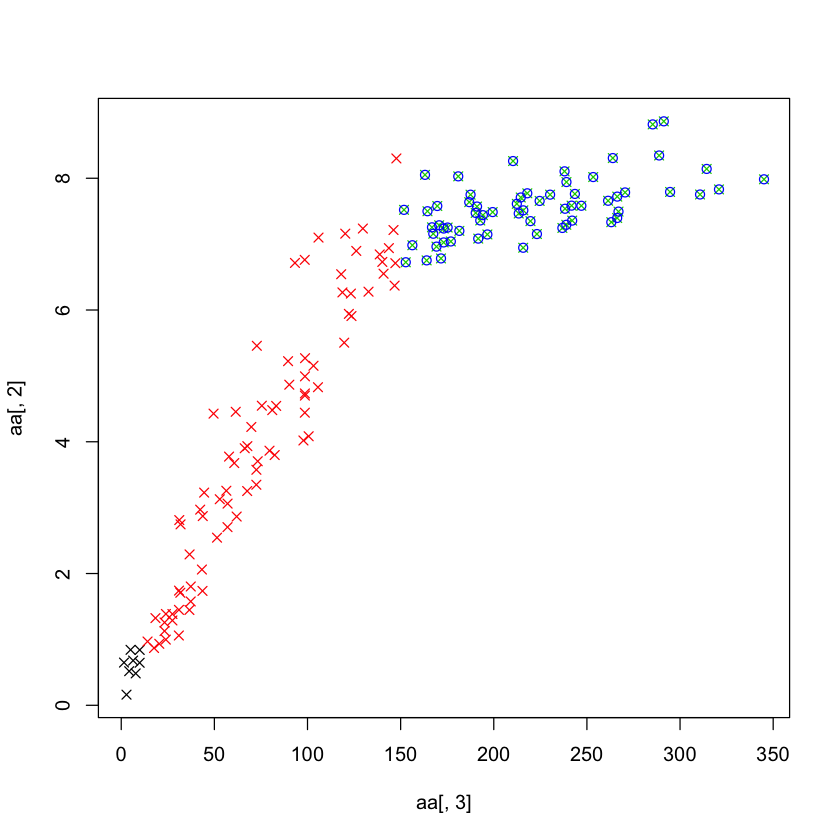

In [39]:
## visual cluster plot
b<-aa[which(aa$cluster==3),]
plot(x=aa[,3], y=aa[,2], col=as.factor(aa$cluster),pch=4)
points(x=b[,3], y=b[,2], add=T, col="blue")
rm(b)

In [40]:
## data description
  a.md<-data.frame(colnames(a.0)[-c(6,7)],t(a.0[1,-c(6,7)]),stringsAsFactors = F)
  row.names(a.md)=NULL
  # colnames(a.md)=c("Metadata","Content")
  a.md<-rbind(a.md,c("Subset sample size",dim(a.0)[1]))
  a.md<-rbind(a.md,c("Normality of log Population Change",round(shapiro.test(log(a.0$Popn_Change))$p.value,2)))
  a.md<-rbind(a.md,c("Normality of log time of experiment",round(shapiro.test(log(a.0$Time.hr))$p.value,2)))
  k<-0;for(i in 1:2){j<-ifelse(i<2,"Time.hr","Population Change");k<-c(k,paste0(c("Min", "1stQt","Median","3rdQt","Max"),"_",j))};rm(i,j)
  a.md<-data.frame(c(a.md[,1],k[-1]),c(a.md[,2],round(fivenum(a.0$Time.hr),2),round(fivenum(log(a.0$Popn_Change)),2)));rm(k)
  for(i in 1:dim(a.md)[2]){a.md[,i]<-as.character(a.md[,i])};rm(i) ## class issue
  j.0<-c("N0", "log", "K");for(i in 1:3){
    a.md<-rbind(a.md,c(paste("Population change Mean of cluster",j.0[i]),round(mean(aa[which(aa$cluster==i),4]),2))) ## raw data before log
  };rm(i)

## data exporting

In [41]:
write.table(a.md[c(1:6),],"../data/Log_DataSource.txt",quote = F, row.names = F, sep = "\t",col.names = F)
write.table(a.md[-5,],"../data/Log_Metadata.txt",quote = F, row.names = F, sep = "\t",col.names = F)

# Data visualization and analysis - R

## raw input

In [42]:
a.0<-read.csv("../data/Log_data.csv",header = T)
a.1<-read.table("../data/Log_Metadata.txt", sep = "\t", header = F, stringsAsFactors = F, blank.lines.skip = T)

## variables

In [43]:
r.m<-(max(a.0[which(a.0$cluster==2),2])-min(a.0[which(a.0$cluster==2),2])) / (max(a.0[which(a.0$cluster==2),3])-min(a.0[which(a.0$cluster==2),3]))
r.b<-max(a.0[which(a.0$cluster==2),2])-r.m*max(a.0[which(a.0$cluster==2),3])
r.x<--r.b/r.m

# Logistic functions - R

## Verhulst / classical logistic
\begin{equation}
N_t = \dfrac{N_0Ke^{rt}}{K+N_0(e^{rt}-1)}
\end{equation}
further adaptations: None

In [44]:
func_log0<-function(N0=as.numeric(a.1[19,2]),
                    K=as.numeric(a.1[21,2]),
                    r=r.m, t){
  ## traditional Logistic equation: y~x
  Nt=N0*K*exp(r*t)/(K+N0*(exp(r*t)-1))
  return(Nt)}

## modified Gompertz
\begin{equation}
A = \text{ln}(\dfrac{N_{max}}{N_{min}})
\end{equation}

\begin{equation}
N_t = A \cdot\text{exp}\Big\{-\text{exp}\Big[\dfrac{r_{max}e}{A}(\lambda-t)+1\Big]\Big\}
\end{equation}
further adaptations:  
\begin{equation*}
N_t = \text{exp}\Big(A \cdot\text{exp}\Big\{-\text{exp}\Big[\dfrac{r_{max}e}{A}(\lambda-t)+1\Big]\Big\}\times1.1\Big)
\end{equation*}
1. assume $r_{max}$ = $r$
2. assume $N_{min}$ = $N_0$
3. assume $N_{max}$ = $K$

In [45]:
func_gom<-function(N0=as.numeric(a.1[19,2]),
                   K=as.numeric(a.1[21,2]),
                   r=r.m, t,
                   ld=r.x){
  ## modified Gompertz model, initial 
  A=log(K/N0)
  Nt=exp(A*exp(-exp(r*exp(1)/A*(ld-t)+1))*1.1) ## mod: exp(f(t)*1.1)
  return(Nt)}

## Baranyi
\begin{equation}
h_0 = (\text{exp}\{\lambda\times r_{max}\}-1)^{-1}
\end{equation}

\begin{equation}
A_t = t+\dfrac{1}{r_{max}}\cdot\text{ln}\Big(\dfrac{e^{-r_{max}t}+h_0}{1+h_0}\Big)
\end{equation}

\begin{equation}
N_t = N_{min}+r_{max}A_t - \text{ln}\Big(1+\dfrac{e^{r_{max}A_t}-1}{e^{N_{max}-N_{min}}}\Big)
\end{equation}
further adaptations:
\begin{equation*}
N_t = N_{min}+e^{r_{max}A_t} - \text{ln}\Big(1+\dfrac{e^{r_{max}A_t}-1}{e^{N_{max}-N_{min}}}\Big)
\end{equation*}
1. assume $r_{max}$ = $r$
2. assume $N_{min}$ = $N_0$
3. assume $N_{max}$ = $K$

In [137]:
func_bar<-function(N0=as.numeric(a.1[19,2]),
                   K=as.numeric(a.1[21,2]),
                   r=r.m, t,
                   tlag=max(a.0[which(a.0$cluster==1),3])){
  ## Baranyi model
  h0=1/(exp(tlag*r)-1)
  At=t+1/r*log((exp(-r*t)+h0)/(1+h0))
  Nt=N0+exp(r*At)-log(1+(exp(r*At)-1)/exp(K-N0))
  return(Nt)}

## Buchanan
\begin{equation}
t \leq t_{lag}: N_t = N_{min}
\end{equation}

\begin{equation}
t_{lag} \lt t \lt t_{max}: N_t = N_{max} + r_{max}\cdot(t-t_{lag})
\end{equation}

\begin{equation}
t \geq t_{max}: N_t = N_{max}
\end{equation}

if "lag", "log" and "stationary" periods = cluster $[cst]$ 1, 2, 3 respectively,  
further adaptations:
1. equation fusion from three into one
2. assume $r_{max}$ = $r$
3. assume $N_{min}$ = $N_0$
4. assume $N_{max}$ = $K$

make only log phase valid for log-phase term:
\begin{equation*}
a.010 = ([cst]-1)mod\;2
\end{equation*}

make only stationary phase valid to base number on K:
\begin{equation*}
a.001 = \text{round-up}([cst]mod\;2.5\;mod\;1)
\end{equation*}
%% LatTex spacing in Math mode <http://www.emerson.emory.edu/services/latex/latex_119.html>

Final conditional equation:
\begin{equation*}
N_t = N_{min}+a.001\times(N_{max}-N_{min})+a.010\times\text{exp}(r\times(t-t_{lag}))
\end{equation*}

In [47]:
func_buc<-function(N0=as.numeric(a.1[19,2]),
                   K=as.numeric(a.1[21,2]),
                   r=r.m, t,
                   tlag=max(a.0[which(a.0$cluster==1),3]),
                   cst=as.numeric(a.0$cluster)){
  ## Buchanan model / three-phase logistic model
  a.010=(cst-1)%%2 ## make only log phase valid in growth rate
  a.001=ceiling(cst%%2.5%%1) ## make only final phase valid
  Nt=N0+a.001*(K-N0)+a.010*exp(r*(t-tlag)) ## mod: exp(f(t|growth))
  return(Nt)}

## trial plots (associating block floating)

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

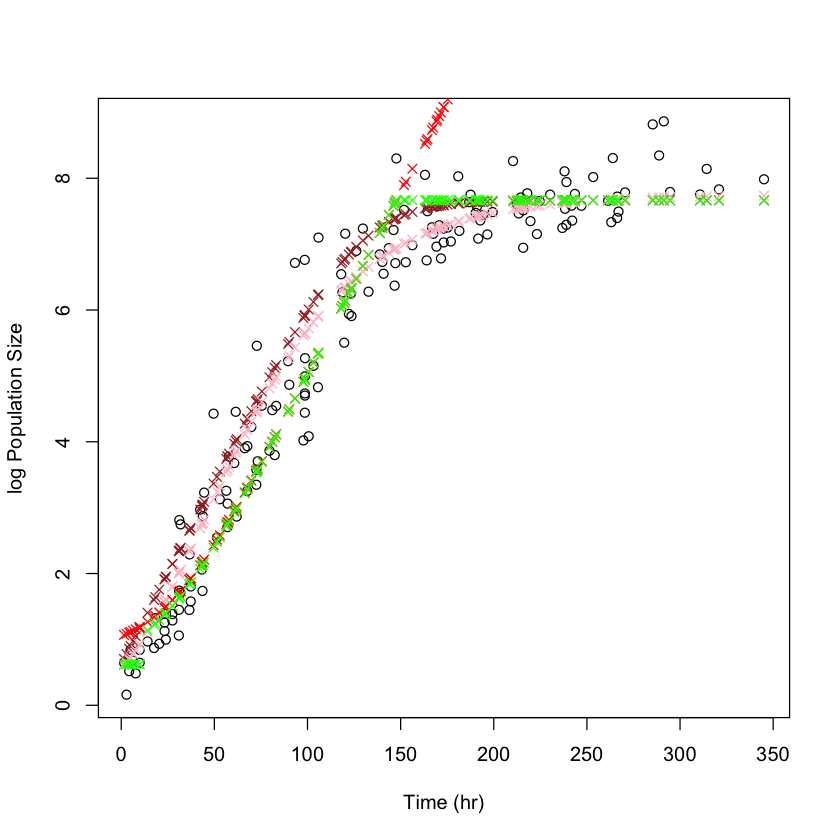

In [138]:
# trial plots (associating block)
# for(i in 1:length(a.0[,3])){
#   j<-a.0[i,3]
#   print(paste(i,j,func_bar(t=j)))};rm(i,j)
plot(log(a.0[,4])~a.0[,3], xlab="Time (hr)", ylab="log Population Size")
points(log(func_log0(t=a.0[,3]))~a.0[,3], pch=4, col="brown", add=T)
points(log(func_gom(t=a.0[,3]))~a.0[,3], pch=4, col="pink", add=T)
points(log(func_bar(t=a.0[,3]))~a.0[,3], pch=4, col="red", add=T)
points(log(func_buc(t=a.0[,3]))~a.0[,3], pch=4, col="green", add=T)

# NLLS - R

## library

In [49]:
library(minpack.lm)

## Verhulst / classical logistic

In [54]:
nls_log0<-nlsLM(Popn_Change ~ func_log0(N0, K, r, t=a.0$Time.hr), data = a.0,
                start = list(N0=as.numeric(a.1[19,2]),
                             K=as.numeric(a.1[21,2]),
                             r=r.m),
                lower = c(min(a.0[which(a.0[,5]==1),4]),
                          min(a.0[which(a.0[,5]==3),4]),
                          r.m-1),
                upper = c(max(a.0[which(a.0[,5]==1),4]),
                          max(a.0[which(a.0[,5]==3),4]),
                          r.m+1))
nls_log0

Nonlinear regression model
  model: Popn_Change ~ func_log0(N0, K, r, t = a.0$Time.hr)
   data: a.0
       N0         K         r 
2.321e+00 2.596e+03 4.382e-02 
 residual sum-of-squares: 82753181

Number of iterations to convergence: 12 
Achieved convergence tolerance: 1.49e-08

## modified Gompertz

In [55]:
nls_gom<-nlsLM(Popn_Change ~ func_gom(N0, K, r, t=a.0$Time.hr, ld), data = a.0,
               start = list(N0=as.numeric(a.1[19,2]),
                            K=as.numeric(a.1[21,2]),
                            r=r.m,
                            ld=r.x),
               lower = c(min(a.0[which(a.0[,5]==1),4]),
                         min(a.0[which(a.0[,5]==3),4]),
                         r.m-1,
                         r.x-1),
               upper = c(max(a.0[which(a.0[,5]==1),4]),
                         max(a.0[which(a.0[,5]==3),4]),
                         r.m+1,
                         r.x+1))
nls_gom

Nonlinear regression model
  model: Popn_Change ~ func_gom(N0, K, r, t = a.0$Time.hr, ld)
   data: a.0
        N0          K          r         ld 
   1.60489 2432.85307    0.05116   -2.50433 
 residual sum-of-squares: 75720207

Number of iterations to convergence: 22 
Achieved convergence tolerance: 1.49e-08

## Baranyi

In [141]:
nls_bar<-nlsLM(Popn_Change ~ func_bar(N0, K, r, t=a.0$Time.hr, tlag), data = a.0,
               start = list(N0=as.numeric(a.1[20,2]),
                            K=as.numeric(a.1[21,2]),
                            r=r.m,
                            tlag=max(a.0[which(a.0$cluster==1),3])),
               lower = c(min(a.0[which(a.0[,5]==1),4]),
                         min(a.0[which(a.0[,5]==3),4]),
                         r.m-1,
                         max(a.0[which(a.0$cluster==1),3])-mean(a.0[which(a.0$cluster==1),3])),
               upper = c(max(a.0[which(a.0[,5]==1),4]),
                         max(a.0[which(a.0[,5]==3),4]),
                         r.m+1,
                         max(a.0[which(a.0$cluster==1),3])+mean(a.0[which(a.0$cluster==1),3])))
nls_bar

ERROR: Error in nlsModel(formula, mf, start, wts): singular gradient matrix at initial parameter estimates


## Buchanan

In [57]:
nls_buc<-nlsLM(Popn_Change ~ func_log0(N0, K, r, t=a.0$Time.hr), data = a.0,
               start = list(N0=as.numeric(a.1[20,2]),
                            K=as.numeric(a.1[21,2]),
                            r=r.m),
               lower = c(min(a.0[which(a.0[,5]==1),4]),
                         min(a.0[which(a.0[,5]==3),4]),
                         r.m-1),
               upper = c(max(a.0[which(a.0[,5]==1),4]),
                         max(a.0[which(a.0[,5]==3),4]),
                         r.m+1))
nls_buc

Nonlinear regression model
  model: Popn_Change ~ func_log0(N0, K, r, t = a.0$Time.hr)
   data: a.0
       N0         K         r 
2.321e+00 2.596e+03 4.382e-02 
 residual sum-of-squares: 82753181

Number of iterations to convergence: 11 
Achieved convergence tolerance: 1.49e-08

# NLLS - py3

# Data plotting - R

## library

In [58]:
library(ggplot2)
library(reshape2)
library(scales) ## rescale ggplot without eliminate bars

## colouring

In [59]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#e79f00", "#9ad0f3", "#F0E442", "#999999", "#cccccc", "#6633ff", "#00FFCC", "#0066cc")

## calculation from functions

In [60]:
a.0$log0<-func_log0(t=a.0$Time.hr)
a.0$gom<-func_gom(t=a.0$Time.hr)
a.0$bar<-func_bar(t=a.0$Time.hr)
a.0$buc<-func_buc(t=a.0$Time.hr)

## melting calculation result for ggplot2

In [64]:
a.2<-melt(a.0[,-c(1,2,4,5)],id="Time.hr",variable.name = "model",value.name = "ExpPop")

## ggplot2 plotting

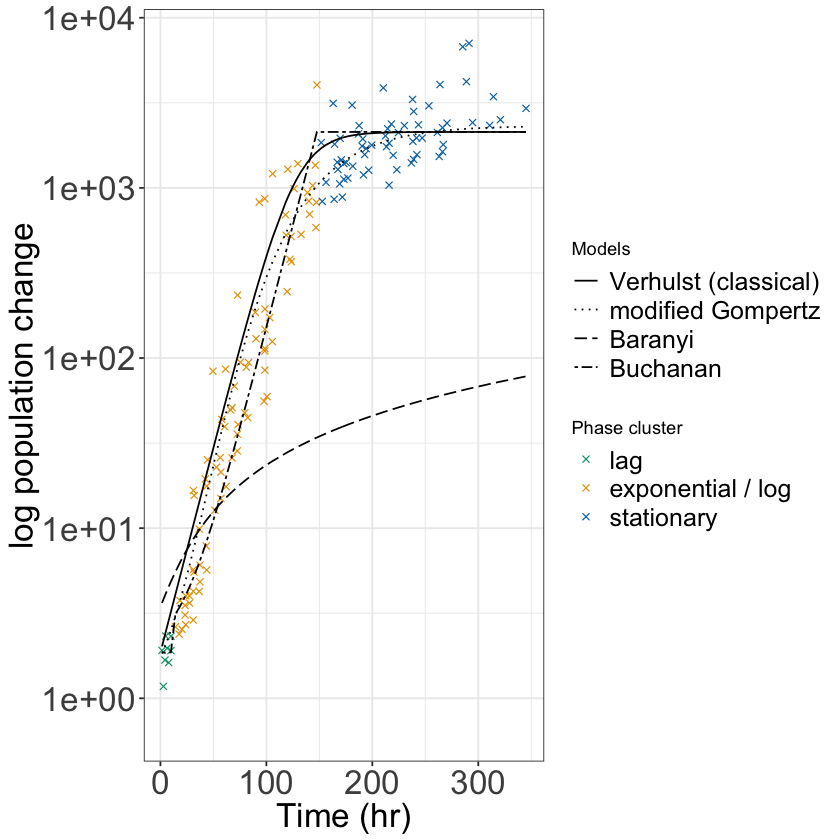

In [66]:
ggp<-ggplot()+theme_bw()+
  theme(axis.title = element_text(size = 20),
        axis.text = element_text(size = 20),
        legend.text = element_text(size = 15))+
  geom_point(aes(x=a.0$Time.hr, y=abs(a.0$Popn_Change), colour=as.factor(a.0$cluster)),shape=4)+
  geom_line(aes(x=a.2$Time.hr, y=a.2$ExpPop, linetype=a.2$model))+
  scale_colour_manual(name="Phase cluster",
                      values = cbbPalette[c(4,2,6)],
                      labels=c("lag","exponential / log","stationary"))+
  scale_linetype_manual(name="Models",
                        values = c(1,3,5,6),
                        labels=c("Verhulst (classical)","modified Gompertz","Baranyi","Buchanan"))+
  scale_y_continuous(labels = scientific,
                     trans = "log10",
                     limits = c(min(abs(a.0$Popn_Change)-.5),max(abs(a.0$Popn_Change))+.5),
                     oob = rescale_none)+ ## <https://stackoverflow.com/questions/10365167/geom-bar-bars-not-displaying-when-specifying-ylim>
  xlab("Time (hr)")+ylab("log population change")
ggp

In [65]:
pdf("../results/Log_data.pdf", width = 13)
ggp
dev.off()

pdf 
  2